# Practica 5 - Forward Propagation y Análisis de Representaciones Intermedias

Implementar forward-propagation para los 3 diagramas dados.

1. Se crean algunas funciones genericas para realizar el foward propagation

In [141]:
#Importamos las librerias que utilizaremos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
#Creamos la función de Activación para los tres diagramas
def sigmoid(X):
    return 1/(1+np.exp(-X))

In [94]:
#Creamos función sencilla para realizar el Forward Propagation
def forwad_propagation(X,WC1,WC2,bias_include):
    #Colocamos una bandera que nos indica si los pesos incluyen bias
    #bias_include=True or False
    if bias_include:
        #El Bias se incluye como un valor 1 en la última columna.
        Bias= np.ones(len(X)).reshape(-1,1)
        X= np.hstack((X,Bias))
    
    #Se hace el Cálculo de la Primera capa oculta
    H1 = sigmoid(np.matmul(X,WC1))
    
    if bias_include:
        #El Bias se incluye como un valor 1 en la última columna.
        Bias= np.ones(len(H1)).reshape(-1,1)
        H1= np.hstack((H1,Bias))

    #Se hace el Cálculo de la Capa de Salida
    H2 = sigmoid(np.matmul(H1,WC2))
    
    #Devolvemos la representación Intermedia(H1) como el Resultado (H2)
    return H1,H2

2. Efectuamos el calculo para los diagramas

<img src="assets/Diagrama1RN.png">

*La caracteristica intermedia h con mayor presencia es la primera neurona de la capa intermedia, al tener un mayor peso sinaptico.*

In [95]:
#Dado que no se dan valores - se ponen de prueba
X= [[0.5,0.6],
    [0.3,0.5],
    [0.2,0.3]]

#Pesos Capas 1
WC1 = np.array([
  [ 5, 7],
  [-2,-3],
  [-8, 1]    
])

#Pesos Capas 2
WC2 = np.array([7,5,-6])

#Valores de Entrada 
#Dado que no se dan valores - se ponen de prueba
X= [[0.5,0.6],
    [0.3,0.5],
    [0.2,0.3]]

#Calculamos Foward_Propagation donde los pesos incluyen bias
_,Resultado= forwad_propagation(X,WC1,WC2,True)
Resultado

array([0.21311319, 0.13752047, 0.12913527])

<img src="assets/Diagrama2RN.png">

*La caracteristica intermedia h con mayor presencia es la tercera neurona de la capa intermedia, al tener un mayor peso sinaptico.*

In [96]:
#Pesos Capas 1
WC1 = np.array([
  [ 0.8, 0.4, 0.3],
  [ 0.2, 0.9, 0.5]
])

#Pesos Capas 2
WC2 = np.array([0.3,0.5,0.9])

#Valores de Entrada - El Bias se incluye como un valor 1 en la última columna.
X= [[1,1]]

#Calculamos Foward_Propagation donde los pesos no incluyen bias
_,Resultado=forwad_propagation(X,WC1,WC2,False)
Resultado

array([0.77438027])

<img src="assets/Diagrama3RN.png">

*A diferencia a los modelos anteriores, aquí las caracteristicas intermedias muestran el mismo peso sinaptico.*

In [98]:
#Pesos Capas 1
WC1 = np.array([
  [ 20, -20],
  [ 20, -20],
  [-10, 30]])

#Pesos Capas 2
WC2 = np.array([20,20,-30])

#Valores de Entrada - El Bias se incluye como un valor 1 en la última columna.
X= [[1,1],
    [1,0],
    [0,1],
    [1,1]]

#Lo redondeamos a cero decimales, para mostrar el efecto de esta función que simula un XOR
_,Resultado=forwad_propagation(X,WC1,WC2,True)
np.rint(Resultado)

array([0., 1., 1., 0.])

### Analisis de Representación Intermedia

Del tercer diagrama analizar la representación intermedia.

In [133]:
#Pesos Capas 1
WC1 = np.array([
  [ 20, -20],
  [ 20, -20],
  [-10, 30]])

#Pesos Capas 2
WC2 = np.array([20,20,-30])

#Valores de Entrada - El Bias se incluye como un valor 1 en la última columna.
X= [[1,1],
    [1,0],
    [0,1],
    [0,0]]

#Lo redondeamos a cero decimales, para mostrar el efecto de esta función que simula un XOR
Intermedia,Resultado=forwad_propagation(X,WC1,WC2,True)

#Redondeamos los resultados a Cero decimales
Intermedia= np.rint(Intermedia).astype(int)
Resultado = np.rint(Resultado).astype(int)

#Calculamos la Matriz de todas las posibles combinaciones XOR con su resultado
matriz = pd.DataFrame({'X1':np.array(X).reshape(-1,2)[:,0],
                       'X2':np.array(X).reshape(-1,2)[:,1],
                       'H1':Intermedia[:,0],
                       'H2':Intermedia[:,1],
                       'Y' :Resultado})

In [135]:
#Mostramos la matriz resultante
matriz

,X1,X2,H1,H2,Y
0,1,1,1,0,0
1,1,0,1,1,1
2,0,1,1,1,1
3,0,0,0,1,0


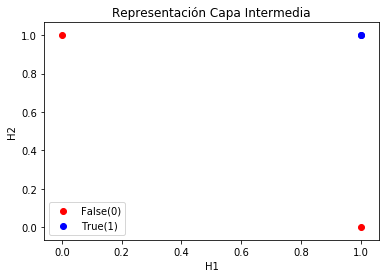

In [159]:
#Realizamos la representación de la capa intermedia por medio de una grafica de puntos
plt.scatter(matriz[matriz['Y']==0]['H1'], matriz[matriz['Y']==0]['H2'], color='r', label="False(0)")
plt.scatter(matriz[matriz['Y']==1]['H1'], matriz[matriz['Y']==1]['H2'], color='b', label="True(1)")
plt.title('Representación Capa Intermedia')
plt.xlabel('H1')
plt.ylabel('H2')
plt.legend()
plt.show()

#### Análisis y Conclusiones Representación Capa Intermedia

En base a la gráfica mostrada puedo concluir:
- Con la representación de la capa intermedia, podemos ver que ya se podría hacer hacer una división lineal de los resultados que estamos buscando clasificar.
- Usando esta representación, ya podemos usar modelos que nos permitan dividir los datos linealmente (Regresión Logistica)
- La última neurona (de la capa de salida) puede efectuar una regresión logistica de los datos y efectuar la clasificación esperada.

## Parte 2 - Conexiones Neuronales

Determinar el número de parámetros entrenables(pesos) en cada uno de los siguientes modelos:

**Imagen 1**
<img src="assets/CNImagen1.png">

*Resultado:*
- Sin tomar en Cuenta el Bias, el modelo tienen 3 parametros entrenables.
- Tomando el Bias, el modelo tiene 4 parametros entrenables.

**Imagen 2**
<img src="assets/CNImagen2.png">

*Resultado:*
- El modelo tiene 3 parametros entrenables (A diferencia del Anterior, aquí si se especifica que se necesita el Bias).

**Imagen 3**
<img src="assets/CNImagen3.png">

*Resultado:*
- Sin tomar en Cuenta el Bias, el modelo tienen 12 parametros entrenables.
- Tomando el Bias, el modelo tiene 16 parametros entrenables.

**Imagen 4**
<img src="assets/CNImagen4.png">

*Resultado:*
- El Modelo tiene 9 parametros entrenables (Aquí claramente se especifica que el modelo si usa Bias).

**Imagen 5**
<img src="assets/CNImagen5.png">

*Resultado:*
- Sin tomar en Cuenta el Bias, el modelo tienen 10 parametros entrenables.
- Tomando el Bias, el modelo tiene 15 parametros entrenables.

*Nota:Según se ve en la imagen no todas las entradas estan asociadas con todas las neuronas en la capa intermedia, se asume que así debe ser, y en base a ésto se hizo el cálculo.*

**Imagen 6**
<img src="assets/CNImagen6.png">

*Resultado:*
- Sin tomar en Cuenta el Bias, el modelo tienen 20 parametros entrenables.
- Tomando el Bias, el modelo tiene 26 parametros entrenables.